# Book Recommendation system using Pearson Corelation.

## Minor Project


BACHELOR OF TECHNOLOGY\
Computer Science and Engineering\
2019-2023

## Team
1. Konark Lohat
2. Gautam Jain
3. Jaskamal Singh

Dataset - http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
# Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading dataset with their respective (and required) features 

In [3]:
# Books dataset
books = pd.read_csv('./data/BX-Books.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

# Users dataset
users = pd.read_csv('./data/BX-Users.csv', sep = ';', error_bad_lines = False, encoding='latin-1')
users.columns = ['userID', 'Location', 'Age']

# Ratings dataset
ratings = pd.read_csv('./data/BX-Book-Ratings.csv', sep = ';', error_bad_lines = False, encoding='latin-1')
ratings.columns = ['userID', 'ISBN', 'bookRating']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

In [4]:
# Books dataset
print("\033[1mBooks Dataset\033[0m")
print("Rows - ", books.shape[0])
print("Cols - ", books.shape[1])
print("Cols are - ", list(books.columns))

# Users dataset
print("\n\033[1mUsers Dataset\033[0m")
print("Rows - ", users.shape[0])
print("Cols - ", users.shape[1])
print("Cols are - ", list(users.columns))

# Ratings dataset
print("\n\033[1mRatings Dataset\033[0m")
print("Rows - ", ratings.shape[0])
print("Cols - ", ratings.shape[1])
print("Cols are - ", list(ratings.columns))

Books Dataset
Rows -  271360
Cols -  8
Cols are -  ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

Users Dataset
Rows -  278858
Cols -  3
Cols are -  ['userID', 'Location', 'Age']

Ratings Dataset
Rows -  1149780
Cols -  3
Cols are -  ['userID', 'ISBN', 'bookRating']


# Rating Distribution

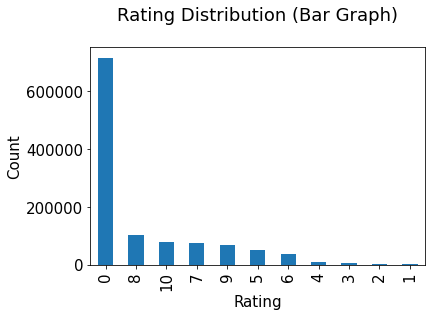

In [5]:
plt.rc('font', size = 15)
ratings.bookRating.value_counts(sort = True).plot(kind = 'bar')
plt.title("Rating Distribution (Bar Graph)\n")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('./figures/rating-distribution.png', bbox_inches = 'tight')
plt.show()

# User's Age Distribution

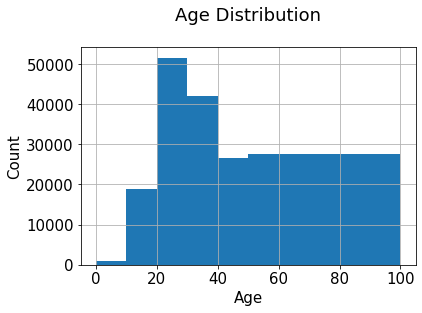

In [6]:
users.Age.hist(bins = [0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./figures/user-age-distribution.png', bbox_inches = 'tight')
plt.show()

# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings won't be used in the model.

# Recommendation Based on Rating Counts

In [7]:
# User's ratings
userRatingCount = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(userRatingCount[userRatingCount >= 200].index)]

# Book's ratings
bookRatingCount = ratings['bookRating'].value_counts()
print(bookRatingCount[bookRatingCount >= 100].index)
ratings = ratings[ratings['bookRating'].isin(bookRatingCount[bookRatingCount >= 100].index)]

Int64Index([0, 8, 10, 9, 7, 5, 6, 4, 3, 2, 1], dtype='int64')


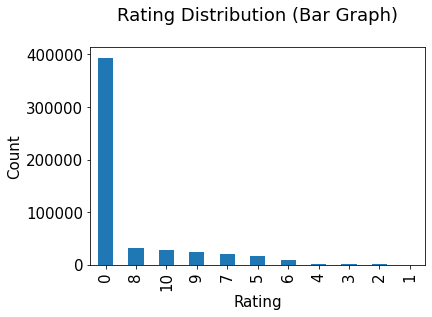

In [8]:
# TESTING THE EXCLUSION
plt.rc('font', size = 15)
ratings.bookRating.value_counts(sort = True).plot(kind = 'bar')
plt.title("Rating Distribution (Bar Graph)\n")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('./figures/rating-distribution.png', bbox_inches = 'tight')
plt.show()

In [9]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,365
0316666343,272
0060928336,221
0440214041,218
0385504209,217


### The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [10]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0060928336', '0440214041', '0385504209'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
3,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
4,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...


## **Collaborative Filtering Using Pearsons'R Correlation**

### We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

### First, we need to find out the average rating, and the number of ratings each book received.

In [16]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,0.435616,365
0316666343,3.198529,272
0060928336,1.909502,221
0440214041,1.885321,218
0385504209,3.170507,217


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

## Rating matrix


In [14]:
# We convert the ratings table to a 2D matrix. 
#The matrix will be sparse because not every user rated every book.

ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=200].sort_values('pearsonR', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,272
0385504209,0.143711,217
0440214041,0.118024,218
0060928336,0.109955,221
0971880107,0.060428,365
0440211727,0.001592,203
044021145X,-0.012994,204


We obtained the books’ ISBNs, but we need to find out the titles of the books to see whether they make sense.

In [20]:
books_corr_to_bones = pd.DataFrame(['0316666343', '0385504209', '0440214041', '0060928336', '0971880107', '0440211727', '044021145X'], 
                                  index=np.arange(7), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
2,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
5,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell,http://images.amazon.com/images/P/0440211727.0...,http://images.amazon.com/images/P/0440211727.0...,http://images.amazon.com/images/P/0440211727.0...
6,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...
